<a href="https://colab.research.google.com/github/noahkarsky/Spatial_Shrooms/blob/main/iNaturalist_Dataset_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install contextily

     |████████████████████████████████| 19.3MB 1.2MB/s 


In [3]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 8.4MB/s 
     |████████████████████████████████| 15.4MB 175kB/s 
     |████████████████████████████████| 6.6MB 22.8MB/s 


In [20]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import requests
import urllib
import geopandas
import contextily as ctx
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DataStuff/shroom_spatial/observations-174864.csv')

# this website has the info behind all of the columns: https://www.inaturalist.org/observations/export


In [7]:
df.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'user_id', 'user_login', 'created_at', 'updated_at',
       'quality_grade', 'license', 'url', 'image_url', 'sound_url', 'tag_list',
       'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'coordinates_obscured', 'positioning_device',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id', 'taxon_kingdom_name', 'taxon_phylum_name',
       'taxon_subphylum_name', 'taxon_superclass_name', 'taxon_class_name',
       'taxon_subclass_name', 'taxon_superorder_name', 'taxon_order_name',
       'taxon_suborder_name', 'taxon_superfamily_name', 'taxon_family_name',
       'taxon_subfamily_name', 'taxon_supertribe_name', 'taxon_tribe_name',
       'taxon_subtribe_name', 'taxon_genus_name', 'taxon_genushyb

I did not download all of the available columns from the inaturalist website, but I believe that I grabbed all the necessary features to help us in the ultimate quest of finding shrooms

In [8]:
df.isna().sum()

id                                     0
observed_on_string                     3
observed_on                            3
time_observed_at                     170
time_zone                              0
user_id                                0
user_login                             0
created_at                             0
updated_at                             0
quality_grade                          0
license                             2017
url                                    0
image_url                              2
sound_url                           5175
tag_list                            5094
description                         4532
num_identification_agreements          0
num_identification_disagreements       0
captive_cultivated                     0
oauth_application_id                1136
place_guess                            1
latitude                               0
longitude                              0
positional_accuracy                  903
coordinates_obsc

In [14]:
df.iloc[135,:]

id                                                                            4463558
observed_on_string                            Sun Oct 30 2016 14:43:11 GMT-0500 (CDT)
observed_on                                                                2016-10-30
time_observed_at                                            2016-10-30 09:43:11 -1000
time_zone                                                  Central Time (US & Canada)
user_id                                                                        302101
user_login                                                                      gtguy
created_at                                                  2016-10-30 10:05:42 -1000
updated_at                                                  2021-06-12 18:02:35 -1000
quality_grade                                                                needs_id
license                                                                      CC-BY-NC
url                                   http://www.inatu

In [9]:
df.quality_grade.value_counts()


needs_id    2867
research    2297
casual        11
Name: quality_grade, dtype: int64

ah. even though I know not all reserarch grade will be accurate, it is encouraging to see that we have a decent number of observations in this category

lets look at an image just for fun

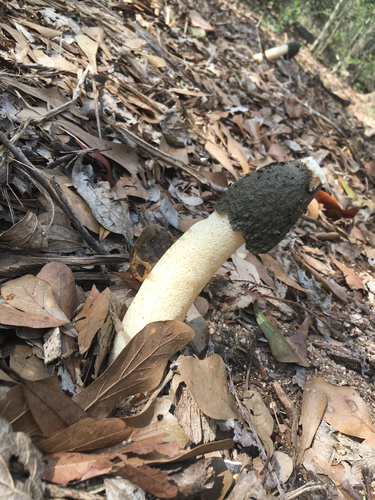

In [18]:
im = Image.open(requests.get(df.iloc[185,12], stream=True).raw)
im

Ah nice a little stinkhorn :)

Time to dig into plotting these points on a map. 

In [21]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

In [23]:
aoi = gpd.read_file('/content/drive/MyDrive/DataStuff/shroom_spatial/spatial/soilsa_a_tx201.shp')

Text(0.5, 1.0, 'Hexbin (# Observations) with Harris County Outline')

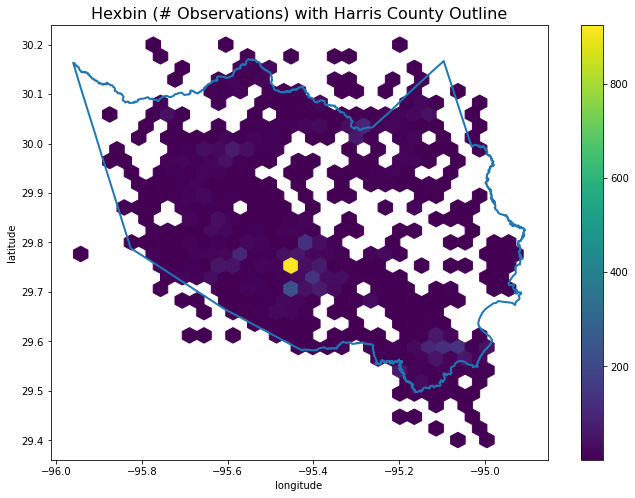

In [65]:
fig , ax = plt.subplots(figsize=(12, 8))
base = gdf.plot(ax = ax ,kind = 'hexbin',x = 'longitude',y = 'latitude',mincnt = 1,reduce_C_function=np.sum,cmap="viridis",gridsize=30)
aoi.boundary.plot(ax  = ax,linewidth = 2)
ax.set_title('Hexbin (# Observations) with Harris County Outline',fontsize = 16)

One bin in particular has a huge amount of the observations. Probably memorial park or something...

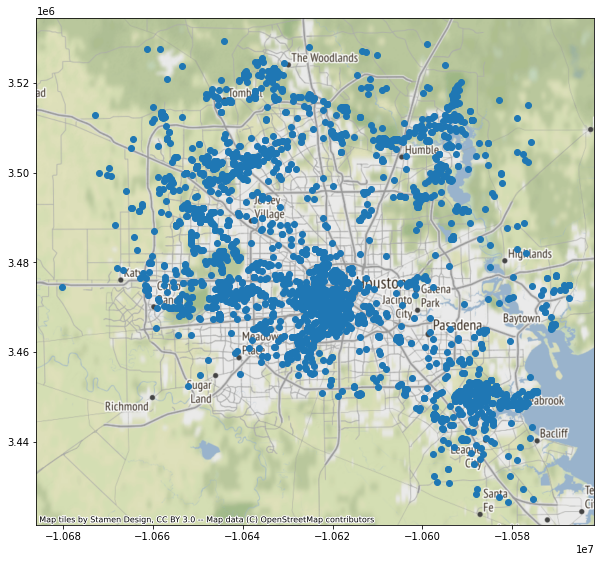

In [33]:
_gdf = gdf.set_crs(crs= 4326)
_gdf = _gdf.to_crs(epsg=3857)

ax = _gdf[_gdf.longitude < -20].plot(figsize=(10,10))
ctx.add_basemap(ax)